# Homework 3


In [106]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
from urllib.request import urlopen

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [107]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [122]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

#### I imported all the necessary libraries below.

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmath as math
import sklearn
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



## Subtask 1: k-nn Algorithm

To do the classification I applied knn algorithm which is a supervised learning. I divided the data into two as test and train. I created a model using the knn algorithm and I fit the model on the train data then predicted test data. Finally, I obtained the accuracy value and confision matrix comparing the estimated data with the actual data.

k-nn algorithm purpose is to use a SONAR data in which the data points are separated into two classes as mine ("M") and rock("R") to predict the classification of a new sample point. At this algorithm we know the classes and expected outputs.



In [124]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:,0:60], SONAR.iloc[:,60], test_size=0.33)

model = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
print(confusion_matrix(Ytest,predicted))
accuracy_score(Ytest,predicted)

[[32  4]
 [10 23]]


0.7971014492753623

## Subtask 2: k-means Algorithm

I used K-means clustering that is a type of unsupervised learning. As in k-nn, I divided the data into two as test and train. I created a model using the k-means and I fit the model on the train data then predicted test data. Finally, I obtained the accuracy value and confision matrix comparing the estimated data with the actual data.

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. I determined K as 2.

In [133]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(SONAR.iloc[:, 0:60], SONAR.iloc[:,60], test_size=0.33)

model = KMeans(n_clusters=2, random_state=9).fit(Xtrain)
predicted = model.predict(Xtest)
transform = {"R": 0, "M": 1}
real = Ytest.map(lambda x: transform[x])
print(confusion_matrix(real,predicted))
accuracy_score(real,predicted)


[[22 10]
 [22 15]]


0.5362318840579711

## Subtask 3: Hiearchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points. Form a cluster by joining the two closest data points resulting in K-1 clusters. Repeat Form more clusters by joining the two closest clusters resulting in K-2 clusters. Repeat these steps until one big cluster is formed. Once single cluster is formed, dendrograms are used to divide into multiple clusters.


I cut the tree into 2 because there are two categories in SONAR dataset. 

0.5096153846153846
[[70 27]
 [75 36]]


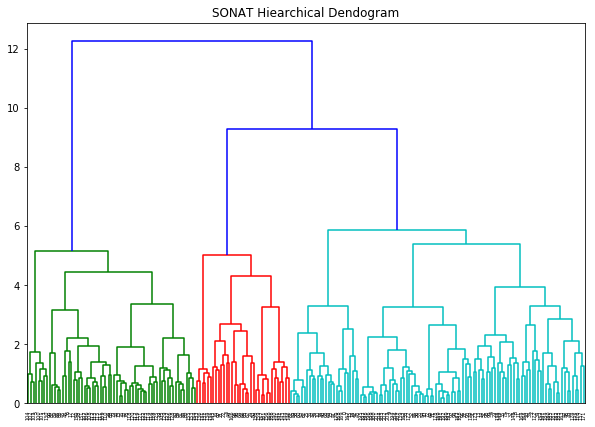

In [134]:
      
dmy = pd.get_dummies(SONAR.iloc[:,60])
SONAR_dmy = pd.concat([SONAR.iloc[:,0:60], dmy], axis=1)
X=SONAR_dmy.iloc[:,0:60]
y_R=SONAR_dmy.iloc[:,60]
        
plt.figure(figsize=(10, 7))  
plt.title("SONAT Hiearchical Dendogram")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
Hclus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(X)
print(accuracy_score(y_R,Hclus.labels_))
print(confusion_matrix(y_R,Hclus.labels_))

## Subtask 3: Logistic Regression

Logistic regression in a supervised learning model. It is used when the response variable is categorical in nature. For instance, yes/no, true/false. For SONAR dataset, dependent variable is categorical so logistic regression can be used classify as the object mine or rock. 


In [135]:

dmy = pd.get_dummies(SONAR.iloc[:,60])
SONAR_dmy = pd.concat([SONAR.iloc[:,0:60], dmy], axis=1)
X=SONAR_dmy.iloc[:,0:60]
y_R=SONAR_dmy.iloc[:,60]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y_R, test_size = 0.33, random_state=25)
LogReg = LogisticRegression()
LogReg.fit(Xtrain, Ytrain)
predicted = LogReg.predict(Xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, predicted)
print(cm)
ac = accuracy_score(Ytest, predicted)
print(ac)


[[23 10]
 [ 5 31]]
0.782608695652174


C:\Users\Deren\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
print(classification_report(Ytest, predicted))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.76      0.86      0.81        36

   micro avg       0.78      0.78      0.78        69
   macro avg       0.79      0.78      0.78        69
weighted avg       0.79      0.78      0.78        69



### Why can not we apply linear regression ?
For classification problems dependent variables that are categorical and unordered. Linear regression can be used when the dependent variable is continuous and nature of the regression line is linear. In our dataset, dependent variable is a categorical so we can not use linear regression.

## Subtask 3: Gaussian Naive Bayes
The Gaussian Naive Bayes is one supervised classifier model. Bayes’ Theorem provides a way that we can calculate the probability of a hypothesis given our prior knowledge. Gaussian Naive Bayes is an extension of naive Bayes  by assuming a Gaussian distribution. Gaussian is the easiest to work with because we only need to estimate the mean and the standard deviation from our training data. We calculate the mean and standard deviation of input values (x) for each class to summarize the distribution. This means that in addition to the probabilities for each class, we must also store the mean and standard deviations for each input variable for each class.

Gaussian Naive Bayes model can bu used to classify SONAR dataset as R or M.


In [137]:

dmy = pd.get_dummies(SONAR.iloc[:,60])
SONAR_dmy = pd.concat([SONAR.iloc[:,0:60], dmy], axis=1)
X=SONAR_dmy.iloc[:,0:60]
y_R=SONAR_dmy.iloc[:,60]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y_R, test_size = .3, random_state=25)
model = GaussianNB()
model.fit(Xtrain, Ytrain)

predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)
print(cm)
ac = accuracy_score(Ytest, predicted)
print(ac)

[[27  4]
 [16 16]]
0.6825396825396826
